# 共享单车预测

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## 导入并处理数据

In [2]:
df_train = pd.read_csv("train.csv") 
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB


In [4]:
df_train['hour']=pd.DatetimeIndex(df_train.datetime).hour
df_train['day']=pd.DatetimeIndex(df_train.datetime).dayofweek
df_train['month']=pd.DatetimeIndex(df_train.datetime).month

df_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,day,month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,5,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,5,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,5,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,5,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,5,1


In [5]:
df_train_origin = df_train 
df_train = df_train.drop(['datetime','casual','registered'], axis = 1)
df_train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,hour,day,month
0,1,0,0,1,9.84,14.395,81,0.0,16,0,5,1
1,1,0,0,1,9.02,13.635,80,0.0,40,1,5,1
2,1,0,0,1,9.02,13.635,80,0.0,32,2,5,1
3,1,0,0,1,9.84,14.395,75,0.0,13,3,5,1
4,1,0,0,1,9.84,14.395,75,0.0,1,4,5,1


In [42]:
y_data = df_train['count'].values
print(y_data.shape)
y_data.shape = (10886,1)
mean = y_data.mean(axis=0)
std = y_data.std(axis=0)
y_data = (y_data - mean) / std
y_data

(10886, 1)


array([[-0.9692938 ],
       [-0.83679677],
       [-0.88096245],
       ...,
       [-0.13014594],
       [-0.34545361],
       [-0.57180271]])

In [43]:
x_data = df_train.drop(['count'], axis = 1).values
print(len(x_data[0,:]))
mean = x_data.mean(axis=0)
std = x_data.std(axis=0)
x_data = (x_data - mean) / std
x_data

11


array([[-1.34986372, -0.17149048, -1.46067232, ..., -1.66894356,
         0.99079257, -1.60312148],
       [-1.34986372, -0.17149048, -1.46067232, ..., -1.52434128,
         0.99079257, -1.60312148],
       [-1.34986372, -0.17149048, -1.46067232, ..., -1.379739  ,
         0.99079257, -1.60312148],
       ...,
       [ 1.33801198, -0.17149048,  0.68461625, ...,  1.36770431,
        -0.50584498,  1.59063939],
       [ 1.33801198, -0.17149048,  0.68461625, ...,  1.51230659,
        -0.50584498,  1.59063939],
       [ 1.33801198, -0.17149048,  0.68461625, ...,  1.65690887,
        -0.50584498,  1.59063939]])

## 模型创建

In [44]:
# # 根据样本样式定义创建占位符（1列）
x = tf.placeholder(tf.float32,[None,11]) # 11个特征
y = tf.placeholder(tf.float32,[None,1]) # 一个输出

In [45]:
# 参数：(输入数据, 前一个神经元个数, 下一层神经元个数, 激活函数)
def add_layer(inputs, in_size, out_size, activation_function=None):
    Weights = tf.Variable(tf.random_normal([in_size, out_size]))
    biases = tf.Variable(tf.zeros([1, out_size]) + 0.1)
    Wx_plus_b = tf.matmul(inputs, Weights) + biases
    if activation_function is None:
        outputs = Wx_plus_b
    else:
        outputs = activation_function(Wx_plus_b)
    return outputs

In [46]:
# 第一层网络
Z1 = add_layer(x, 11, 10, tf.nn.sigmoid)
# 第二层网络
prediction = add_layer(Z1, 10, 1, tf.nn.sigmoid)

# 损失函数
loss = tf.reduce_mean(tf.square(y - prediction))

# 使用梯度下降法最小化误差以此来更新权重
train = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

In [47]:
# 交叉熵
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels = y, logits = prediction))

In [48]:
# 定义一个梯度下降法来进行训练的优化器
train =  tf.train.AdamOptimizer(lr).minimize(loss)

## 模型训练

In [49]:
# 初始化变量  
init = tf.global_variables_initializer()

In [50]:
# 启动会话
sess = tf.Session()
sess.run(init)

In [51]:
for step in range(1000):
    sess.run(train, feed_dict={x:x_data, y:y_data})

In [52]:
# 获取预测值
prediction_value = sess.run(prediction, feed_dict={x: x_data})
prediction_value

array([[0.00498074],
       [0.00499642],
       [0.00504568],
       ...,
       [0.01780245],
       [0.01990925],
       [0.01922012]], dtype=float32)

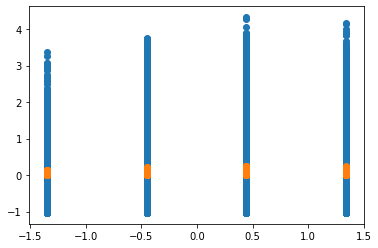

In [55]:
from matplotlib import pyplot as plt
%matplotlib inline

# 画图
plt.figure()
# plt.ion()  #interactive mode on
# 绘制样本点，真实值
plt.scatter(x_data[:, 0], y_data)
# 预测结果
plt.scatter(x_data[:, 0], prediction_value)
plt.pause(0.001)
plt.show()